In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('iris.csv')

In [4]:
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.shape

(150, 6)

In [8]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
df = df.drop("Id", axis=1)

In [10]:
X = df.drop("Species", axis=1)
y = df.iloc[:, -1]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
label_encoder = LabelEncoder()

In [13]:
y_train_transformed = label_encoder.fit_transform(y_train)
y_test_transformed = label_encoder.transform(y_test)


In [14]:
X_train.shape

(120, 4)

In [15]:
y_train_transformed.shape

(120,)

In [28]:
scaler = StandardScaler();

x_train_transformed = scaler.fit_transform(X_train)
x_test_transformed = scaler.transform(X_test)

In [29]:
lr = LogisticRegression()
lr = lr.fit(X_train, y_train_transformed)

In [30]:
print("Model fitted?", hasattr(lr, "coef_"))  # Should print True if fitted


Model fitted? True


In [31]:
y_pred = lr.predict(X_test)

In [32]:
accuracy_score(y_test_transformed, y_pred)

1.0

# Test Data

In [33]:
data = {'Id': [1,2,3,4,5,6,7,8,9,10], 'SepalLengthCm' : [4.2,3.2,6.5,7.3,4.4,5.5,3.6,4.8,5.2,5.1], 'SepalWidthCm' : [3.3,3.2,3.2,3.1,2.3,2.8,2.8,3.3,2.4,2.9], 'PetalLengthCm': [5.8,6.1,6.4,5.6,5.1,0,6.1,5.6,5.5,4.8], 'PetalWidthCm' : [0.2,0.2,1.4,1.5,1.5,1.3,1.5,1.3,1.6,1]}

In [34]:
df = pd.DataFrame(data = data)

In [35]:
print(df)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   1            4.2           3.3            5.8           0.2
1   2            3.2           3.2            6.1           0.2
2   3            6.5           3.2            6.4           1.4
3   4            7.3           3.1            5.6           1.5
4   5            4.4           2.3            5.1           1.5
5   6            5.5           2.8            0.0           1.3
6   7            3.6           2.8            6.1           1.5
7   8            4.8           3.3            5.6           1.3
8   9            5.2           2.4            5.5           1.6
9  10            5.1           2.9            4.8           1.0


In [36]:
def predictor(df):
    df = df.drop("Id", axis=1)
    X = df.iloc[:,0:4]
    label_encoder = LabelEncoder()
    y_train_transformed = label_encoder.fit_transform(y_train)
    y_test_transformed = label_encoder.transform(y_test)
    
    scaler = StandardScaler();

    x_train_transformed = scaler.fit_transform(X_train)
    x_test_transformed = scaler.transform(X_test)

    print(lr.predict(X))
    

In [37]:
predictor(df)

[1 2 2 2 2 0 2 2 2 1]


# Visualization

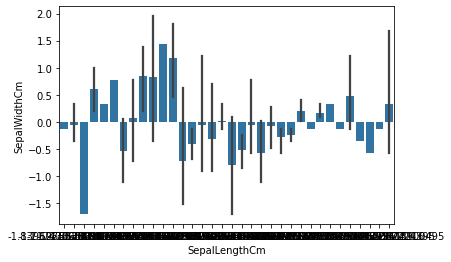

In [51]:
X_train_scaled_df = pd.DataFrame(x_train_transformed, columns=X_train.columns)

sns.barplot(x="SepalLengthCm", y="SepalWidthCm", data=X_train_scaled_df)
plt.show()


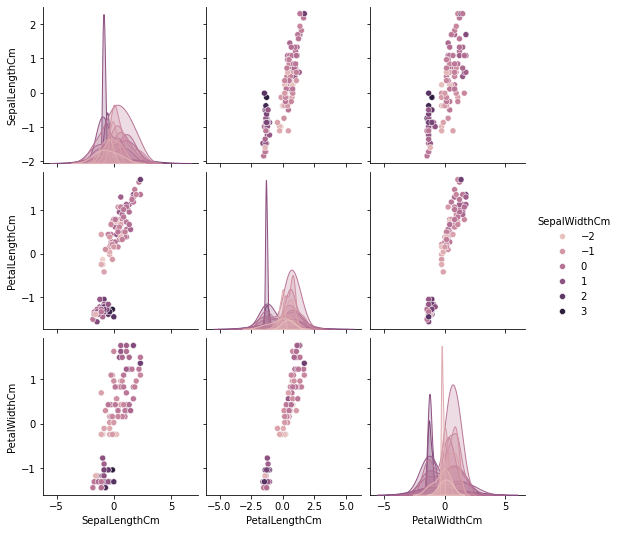

In [55]:
sns.pairplot(X_train_scaled_df, hue="SepalWidthCm", diag_kind="kde")
plt.show()


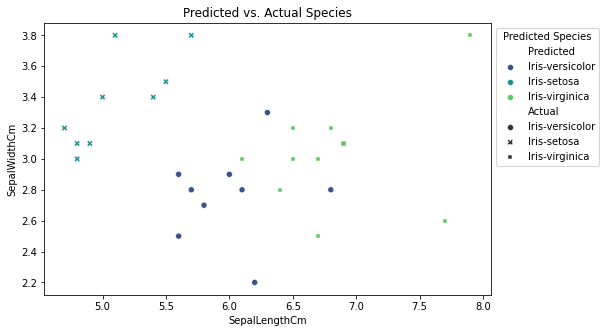

In [56]:
df_test = X_test.copy()  # Copy test features
df_test["Actual"] = label_encoder.inverse_transform(y_test_transformed)  # Add actual species
df_test["Predicted"] = label_encoder.inverse_transform(y_pred)  # Add predicted species

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_test["SepalLengthCm"], y=df_test["SepalWidthCm"], hue=df_test["Predicted"], style=df_test["Actual"], palette="viridis")
plt.legend(title="Predicted Species", bbox_to_anchor=(1, 1))
plt.title("Predicted vs. Actual Species")
plt.show()
